In [31]:
import h5py

In [32]:
with h5py.File('D:/Project/pchem_data/camelyonpatch_level_2_split_train_x.h5', 'r') as h5_file:
    print(list(h5_file.keys()))


['x']


In [33]:
with h5py.File('D:/Project/pchem_data/camelyonpatch_level_2_split_train_y.h5', 'r') as h5_file:
    print(list(h5_file.keys()))

['y']


In [34]:
import h5py

# Load the train_x and train_y datasets from the H5 file separately
with h5py.File('D:/Project/pchem_data/camelyonpatch_level_2_split_train_x.h5', 'r') as h5_file:
    train_x = h5_file['x'][:]
    
with h5py.File('D:/Project/pchem_data/camelyonpatch_level_2_split_train_y.h5', 'r') as h5_file:
    train_y = h5_file['y'][:]

# Create a subset of the data consisting of the first 1000 images
train_x_subset = train_x[:10000]
train_y_subset = train_y[:10000]

# Use the subset for any further analysis
# For example, print the shape of the subset
print(train_x_subset.shape)  # Output: (1000, height, width, channels)
print(train_y_subset.shape)  # Output: (1000, )
print(train_y_subset[0])  # Output: 0

(10000, 96, 96, 3)
(10000, 1, 1, 1)
[[[0]]]


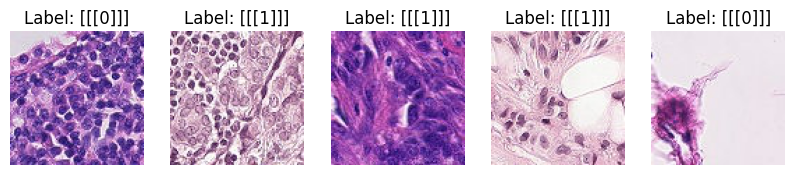

In [35]:
import matplotlib.pyplot as plt

# Plot first 5 images with their labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))

for i in range(5):
    axes[i].imshow(train_x_subset[i])
    axes[i].set_title('Label: {}'.format(train_y_subset[i]))
    axes[i].axis('off')

plt.show()


In [36]:
import torch
from torchvision import transforms

# Define the transforms to be applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Apply the transforms to the subset of the data
train_x_transformed = torch.stack([transform(train_x_subset[i]) for i in range(len(train_x_subset))])
train_y_transformed = torch.Tensor(train_y_subset)

# Print the shape of the transformed data
print(train_x_transformed.shape)  # Output: torch.Size([1000, 3, height, width])
print(train_y_transformed.shape)  # Output: torch.Size([1000])
print(train_y_transformed[0])  # Output: tensor(0.)


torch.Size([10000, 3, 96, 96])
torch.Size([10000, 1, 1, 1])
tensor([[[0.]]])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


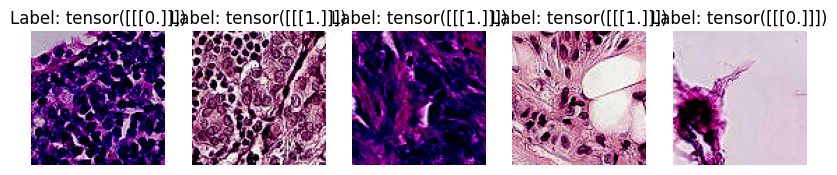

In [37]:
import matplotlib.pyplot as plt

# Plot first 5 transformed images with their labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 10))

for i in range(5):
    axes[i].imshow(train_x_transformed[i].permute(1, 2, 0))
    axes[i].set_title('Label: {}'.format(train_y_transformed[i]))
    axes[i].axis('off')

plt.show()


In [38]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Set the seed for reproducibility
torch.manual_seed(42)

# Define the indices for train, test, and validation sets
num_samples = len(train_x_transformed)
indices = list(range(num_samples))
split1 = int(0.8*num_samples)
split2 = int(0.9*num_samples)

train_indices, val_indices, test_indices = indices[:split1], indices[split1:split2], indices[split2:]

# Create TensorDatasets for train, test, and validation sets
train_dataset = TensorDataset(train_x_transformed[train_indices], train_y_transformed[train_indices])
val_dataset = TensorDataset(train_x_transformed[val_indices], train_y_transformed[val_indices])
test_dataset = TensorDataset(train_x_transformed[test_indices], train_y_transformed[test_indices])

# Create DataLoaders for train, test, and validation sets
batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)



In [39]:
def to_tensor(image, label):
    x = transforms.functional.to_tensor(image)
    y = torch.tensor(label)
    return x, y.flatten()


In [40]:
print(labels.shape)

torch.Size([4, 1, 1, 1])


Epoch [1], Loss: 0.2812, Validation Accuracy: 88.40%
Epoch [2], Loss: 0.2682, Validation Accuracy: 88.60%
Epoch [3], Loss: 0.2870, Validation Accuracy: 89.60%
Epoch [4], Loss: 0.2957, Validation Accuracy: 90.10%
Epoch [5], Loss: 0.3143, Validation Accuracy: 89.60%
Epoch [6], Loss: 0.3523, Validation Accuracy: 90.20%
Epoch [7], Loss: 0.3478, Validation Accuracy: 90.10%
Epoch [8], Loss: 0.3821, Validation Accuracy: 90.50%
Epoch [9], Loss: 0.3468, Validation Accuracy: 90.60%
Epoch [10], Loss: 0.3862, Validation Accuracy: 89.30%
Epoch [11], Loss: 0.3909, Validation Accuracy: 89.80%
Epoch [12], Loss: 0.4139, Validation Accuracy: 90.80%
Epoch [13], Loss: 0.3890, Validation Accuracy: 90.30%
Epoch [14], Loss: 0.3839, Validation Accuracy: 90.70%
Epoch [15], Loss: 0.3818, Validation Accuracy: 90.10%
Epoch [16], Loss: 0.3705, Validation Accuracy: 90.30%
Epoch [17], Loss: 0.3340, Validation Accuracy: 90.90%
Epoch [18], Loss: 0.3761, Validation Accuracy: 90.40%
Epoch [19], Loss: 0.4023, Validation 

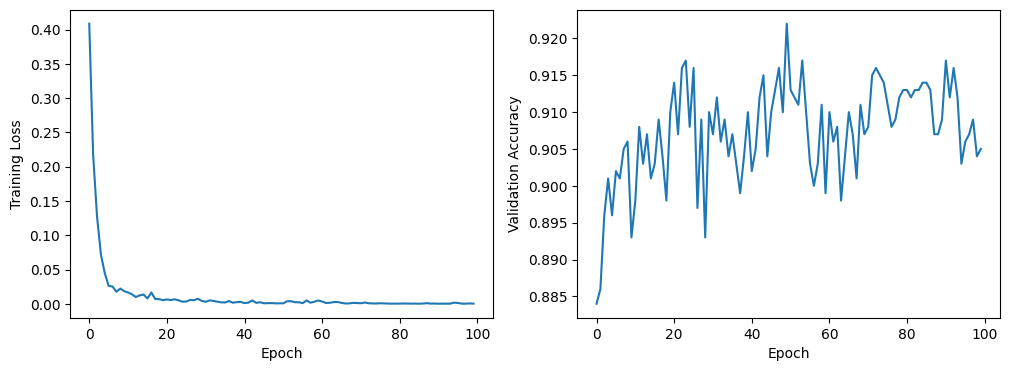

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt

# Load a pretrained ResNet18 model
resnet18 = models.resnet18(pretrained=True)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 2)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

# Define the number of epochs
num_epochs = 100

# Store the training loss and validation accuracy for each epoch
train_loss_values = []
val_accuracy_values = []

for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    resnet18.train()  # Set the model to training mode

    # Train the model using the train data loader
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        labels = labels.squeeze(1).squeeze(1).squeeze(1).long()  # Convert to long type and remove extra dimensions from labels
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(train_dataloader.dataset)

    train_loss_values.append(epoch_loss)

    resnet18.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    running_corrects = 0

    # Evaluate the model using the validation data loader
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = resnet18(inputs)
            labels = labels.squeeze(1).squeeze(1).squeeze(1).long()  # Convert to long type and remove extra dimensions from labels
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(val_dataloader.dataset)
    epoch_acc = running_corrects.double() / len(val_dataloader.dataset)

    val_accuracy_values.append(epoch_acc)
    
    # Print epoch statistics
    print('Epoch [%d], Loss: %.4f, Validation Accuracy: %.2f%%' %
          (epoch + 1, epoch_loss, epoch_acc*100))

# Plot the training loss vs epoch and validation accuracy vs epoch
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(range(num_epochs), train_loss_values)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Training Loss')

ax[1].plot(range(num_epochs), val_accuracy_values)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Validation Accuracy')

plt.show()
